In [1]:
import importlib

import numpy as np
from matplotlib import pyplot as plt

from analysis import session, acr_sess_analys
from sess_util import sess_gen_util, sess_ntuple_util
from util import gen_util, math_util, plot_util

importlib.reload(acr_sess_analys)

<module 'analysis.acr_sess_analys' from '/home/colleen/Documents/AIBS_Analysis/analysis/acr_sess_analys.py'>

In [2]:
plot_util.linclab_plt_defaults()

In [3]:
datadir = '../data/AIBS'
sessid = 758519303

In [4]:
sess = session.Session(datadir, sessid, runtype='prod')
sess.extract_sess_attribs()
sess.extract_info()


Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in ../data/AIBS/prod/mouse_408021/ophys_session_758519303
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...


In [5]:
# SELECTIVITY INDEX
analyspar = sess_ntuple_util.init_analyspar()
stimpar = sess_ntuple_util.init_stimpar(stimtype='gabors')
item_idxs, item_percs, all_rand = acr_sess_analys.surp_idx_by_sess(sess, analyspar, stimpar)

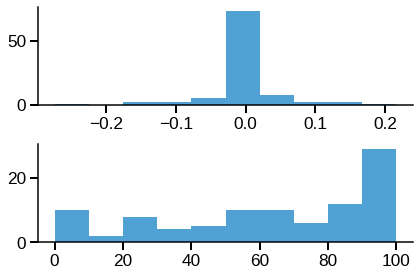

In [6]:
fig, ax = plt.subplots(2)
_ = ax[0].hist(item_idxs)
_ = ax[1].hist(item_percs)

In [7]:
# EVOLUTION OF E response compared to D response
# gabors
stim = sess.get_stim('gabors')
data = []
for s in [0, 1]:
    segs = stim.get_segs_by_criteria(gabfr=3, surp=1, by='seg')
    # remove consecutive
    segs = gen_util.consec(segs, smallest=True)[0]
    if s == 0:
        segs = [seg - 4 for seg in segs]
    twop_fr = stim.get_twop_fr_by_seg(segs, first=True)['first_twop_fr']
    data.append(gen_util.reshape_df_data(stim.get_roi_data(
        twop_fr, pre=0, post=0.45, integ=False, scale=True), squeeze_cols=True))
    data[-1] = math_util.integ(data[-1], 1./sess.twop_fps, axis=-1, nanpol='omit')
diff_data = data[1] - data[0]

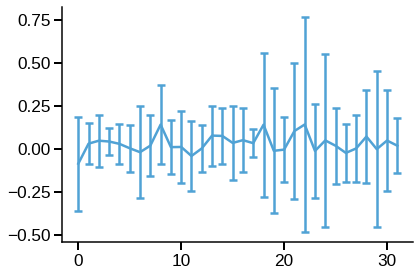

In [8]:
fig, ax = plt.subplots(1)
_ = ax.errorbar(range(diff_data.shape[1]), np.mean(diff_data, axis=0), 
    np.std(diff_data, axis=0))